In [1]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기

#필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# 🗂️ Step 2: 데이터 불러오기

#CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [3]:
# 여기에서 확인해 보세요.
print("✅ 학습 이미지 shape:", train_images.shape)
print("✅ 학습 라벨 shape:", train_labels.shape)
print("✅ 테스트 이미지 shape:", test_images.shape)
print("✅ 테스트 라벨 shape:", test_labels.shape)

✅ 학습 이미지 shape: (50000, 32, 32, 3)
✅ 학습 라벨 shape: (50000, 1)
✅ 테스트 이미지 shape: (10000, 32, 32, 3)
✅ 테스트 라벨 shape: (10000, 1)


In [4]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요. 
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [5]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(64))  # TODO: 은닉층 유닛 수 설정
model.add(layers.Dense(10))  # 출력층: CIFAR-10은 클래스가 10개

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요. 
(padding은 디폴트로 없습니다.)

Answer:\
입력 데이터 : (32, 32, 3)\
첫 번째 합성곱 이후 : (30, 30, 32)\
첫 번째 풀링 이후 : (15, 15, 32)\
두 번째 합성곱 이후 : (13, 13, 64)\
두 번째 풀링 이후 : (6, 6, 64)\
세 번째 합성곱 이후 : (4, 4, 64)\
Flatten 이후 : (1024)\
첫 번째 Dense 이후 : (64)\
두 번째 Dense 이후 : (10)

In [6]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.2097 - loss: 3.6409 - val_accuracy: 0.4135 - val_loss: 1.5730
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4380 - loss: 1.5257 - val_accuracy: 0.4890 - val_loss: 1.4013
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5134 - loss: 1.3432 - val_accuracy: 0.5399 - val_loss: 1.2697
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5647 - loss: 1.2323 - val_accuracy: 0.5798 - val_loss: 1.2091
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6104 - loss: 1.1168 - val_accuracy: 0.6010 - val_loss: 1.1752
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6386 - loss: 1.0436 - val_accuracy: 0.6330 - val_loss: 1.0599
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6614 - loss: 0.9723 - val_accuracy: 0.6326 - val_loss: 1.0818
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6822 -

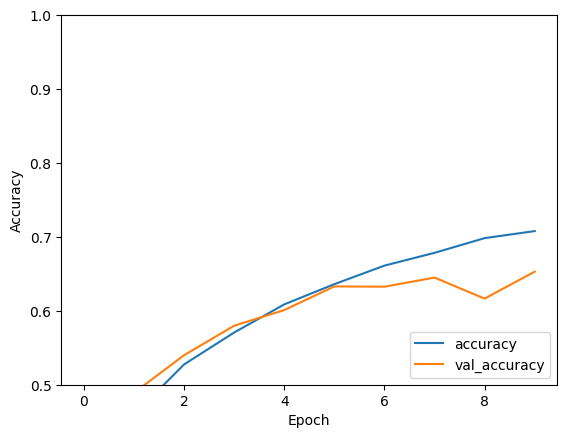

In [7]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [8]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.652999997138977


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


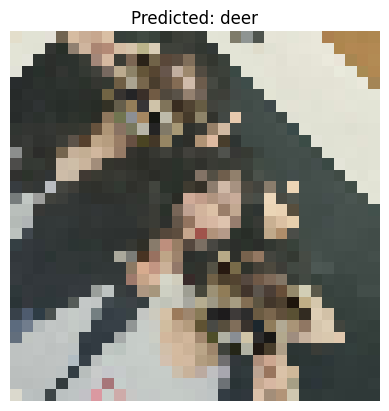

In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화 

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path =  r"C:\Users\user\Downloads\사진.jpg" # 예측할 이미지의 경로 절대경로를 입력하면 됩니다. 뭔가 자신의 얼굴사진을 넣어보면 재미있는일이...
predict_new_image(image_path, model, class_names)


## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

Answer:\
이미지를 255.0으로 나누는 이유는 픽셀 값을 0~1 범위로 정규화(normalization) 하기 위함이다. 일반적인 이미지의 픽셀 값은 0~255 사이의 정수이며, 이 값을 그대로 신경망에 입력하면 학습이 불안정해질 수 있기 때문에 255.0으로 나눈다.

## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer:
1. 지역성(Locality) 가정
→ 인접한 픽셀끼리 의미 있는 정보를 가질 것이라는 가정
→ 작은 커널로 국소 정보를 추출함

2. 가중치 공유(Weight Sharing)
→ 동일한 필터(커널)를 이미지 전체에 적용
→ 학습 파라미터 수 감소 + 위치 불변성 (같은 패턴이 어디에 있든 감지)

3. 계층적 구성(Hierarchical Structure)
→ 저수준(선, 모서리) → 고수준(눈, 얼굴) 특성으로 점점 추상화


이미지에서 중요한 정보는 국소적 특징이고, CNN은 이것을 잘 추출해 냄.
동일한 특징이 이미지 내 어디에 있든지 탐지 가능함.
파라미터가 적어서 학습 효율이 좋고, 과적합 위험도 낮음.

CNN은 이미지 외에도 공간적 또는 순서가 있는 데이터에 잘 작동함.
1. 음성 데이터 처리 (스펙트로그램 기반 음성 인식)
- 2D 이미지처럼 표현된 음향 패턴을 CNN이 인식

2. 자연어 처리 (문장을 행렬로 표현)
- 문장을 임베딩한 후 CNN으로 감정 분석, 문장 분류 수행

3. 시계열 데이터 분석 (주가 예측, 센서 데이터)
- 시계열을 1D로 보고 1D-CNN으로 처리

4. 의료 영상 분석 (CT, MRI 이미지 분류)

- 병변 탐지, 종양 분류 등에 활용

5. 추천 시스템 (사용자-아이템 상호작용을 이미지처럼 모델링)

